# **SpaceX  Falcon 9 First Stage Landing Prediction**


 ## Exploring and preparing data


In this part, we will predict if the Falcon 9 first stage will land successfully. 

We will will perform Exploratory Data Analysis and feature engineering.

## Objectives

Using `pandas` and `matplotlib` we will:

- do exploratory data analysis
- prepare data for feature engineering 

----


### Importing libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis 


Loading and preparing data

In [4]:
df=pd.read_csv("dataset_part_2.csv")

df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's explore how the `FlightNumber` (indicating the continuous launch attempts) and `Payload` variables influence the launch outcome.

We can plot the `FlightNumber` vs. `PayloadMass` and overlay the outcome of the launch. The plot shows that as the flight number increases, the first stage is more likely to land successfully. Additionally, payload mass seems to play a role; heavier payloads tend to have a lower success rate for first stage landings.

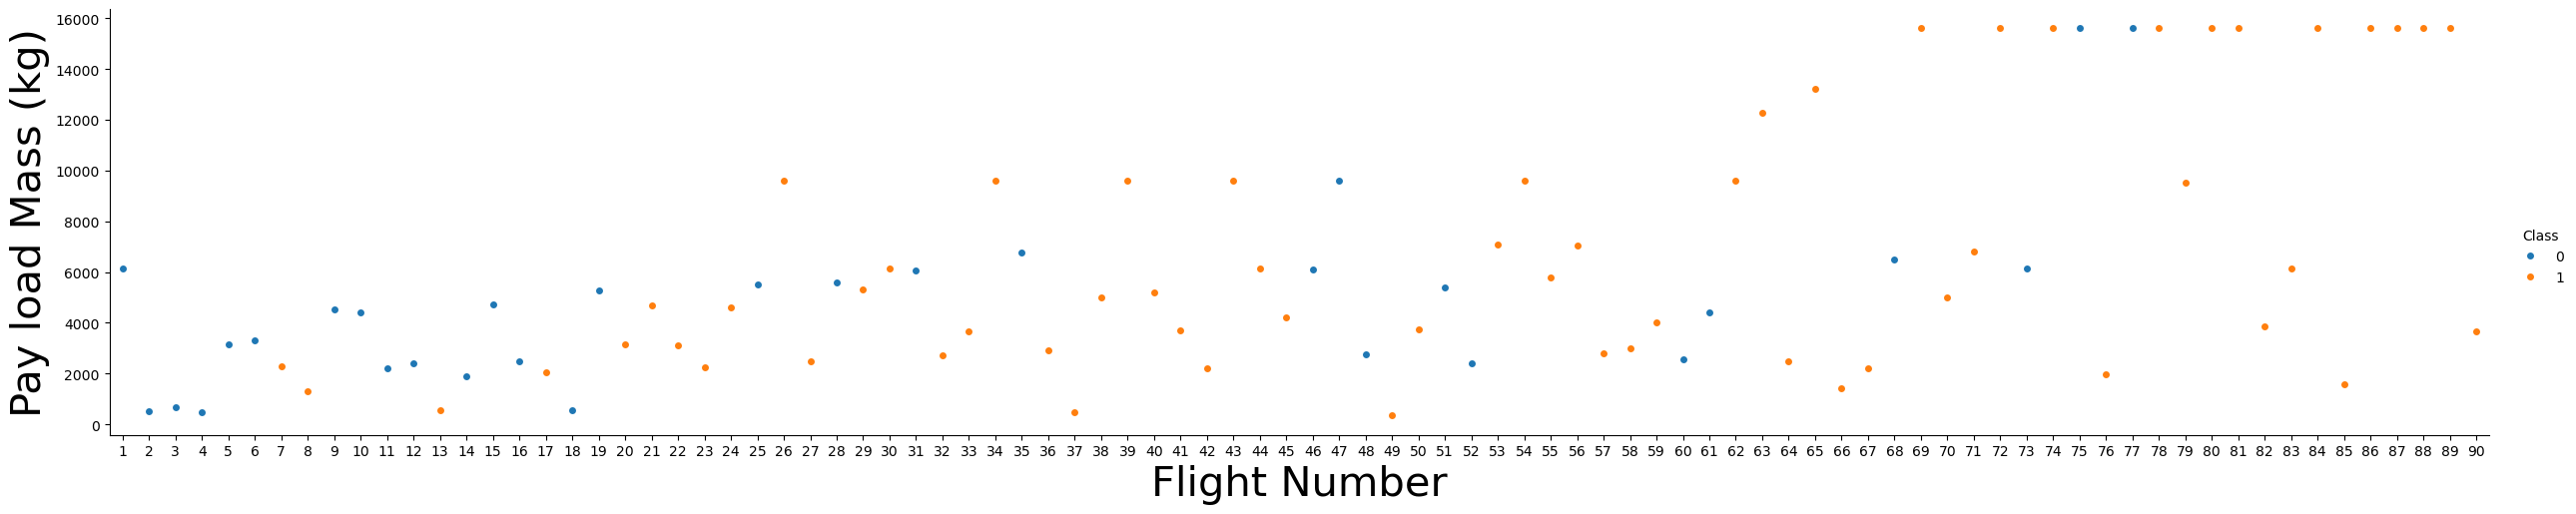

In [6]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=30)
plt.ylabel("Pay load Mass (kg)",fontsize=30)
plt.show()

Next, we'll look into each site and visualize detailed launch records.

### Flight Number vs. Launch Site

We'll use a scatter plot to visualize the relationship between Flight Number and Launch Site, colored by the success class.

* Orange points (Class 1) represent successful launches where the first stage of the rocket landed successfully.
* Blue points (Class 0) represent unsuccessful launches where the first stage of the rocket did not land successfully.

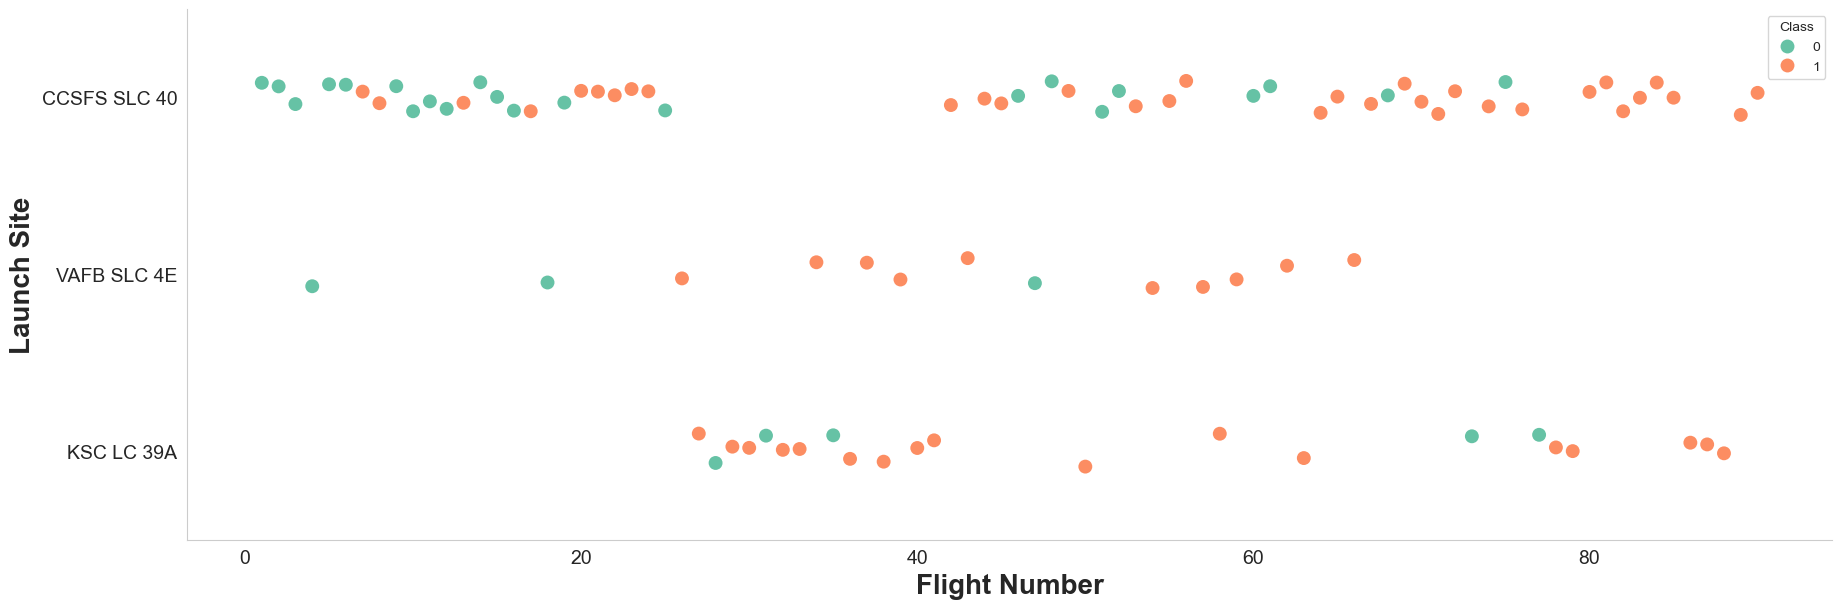

In [10]:
sns.set_style("whitegrid")
sns.set_palette("Set2")

sns.catplot(
    x="FlightNumber", y="LaunchSite", hue="Class", data=df, aspect=3, height=6,
    s=100, legend_out=False
)

plt.xlabel("Flight Number", fontsize=20, weight='bold')
plt.ylabel("Launch Site", fontsize=20, weight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(False)
plt.show()

**Findings:**

* Improvement over time - across all launch sites, there is a clear trend towards higher success rates (more orange points) as flight numbers increase, indicating advancements in technology and procedures.

* Site-specific success rate - CCSFS SLC 40 has shown a steady improvement in success rates, while VAFB SLC 4E has experienced more variability, particularly with higher instances of unsuccessful landings.

### Payload vs. Launch Site

We also want to observe if there is any relationship between launch sites and their payload mass.


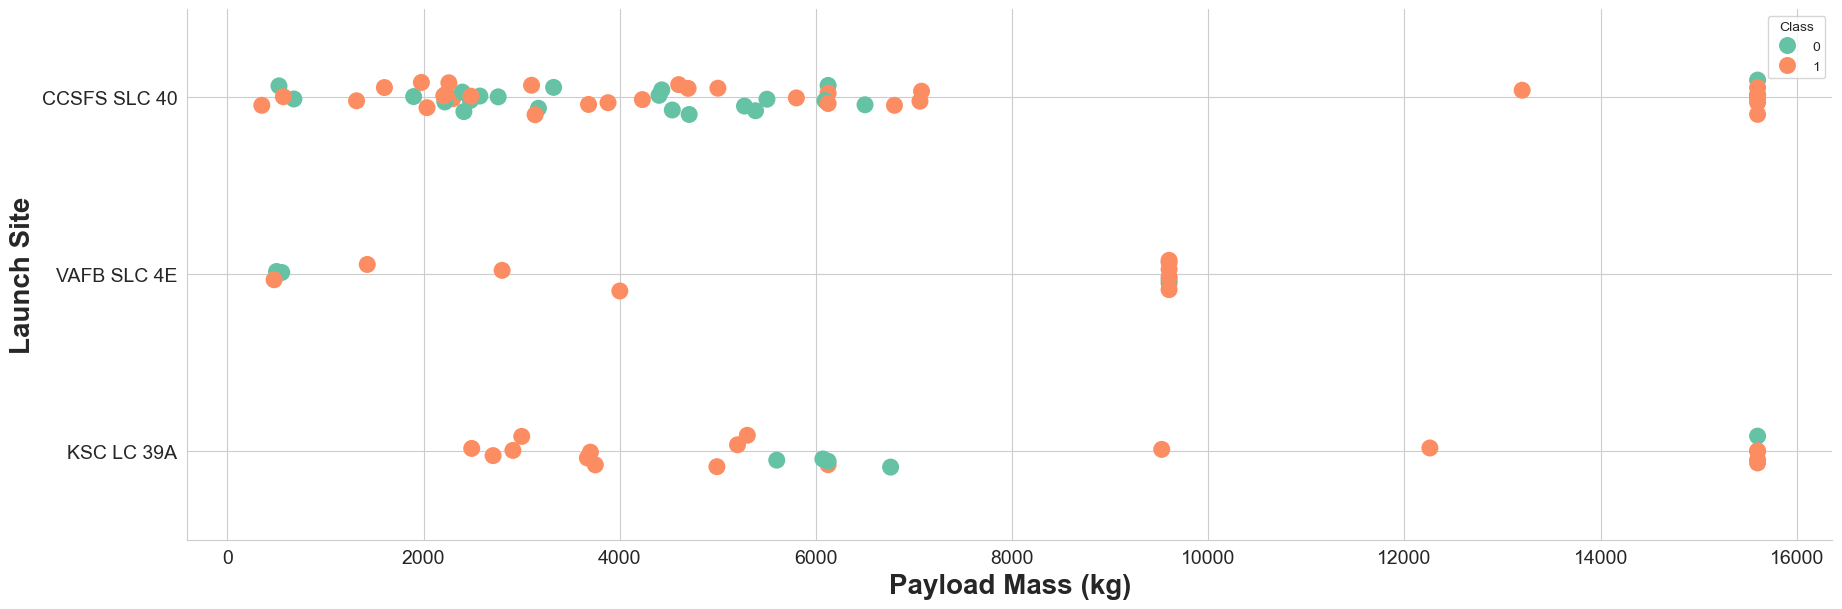

In [14]:
sns.set_palette("Set2")

sns.catplot(
    x="PayloadMass", y="LaunchSite", hue="Class", data=df, aspect=3, height=6,
    s=150, legend_out=False
)

plt.xlabel("Payload Mass (kg)", fontsize=20, weight='bold')
plt.ylabel("Launch Site", fontsize=20, weight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.show()

There are no rockets launched in VAFB-SLC launchsite for heavypayload mass(greater than 10000).

### Success Rate by Orbit Type


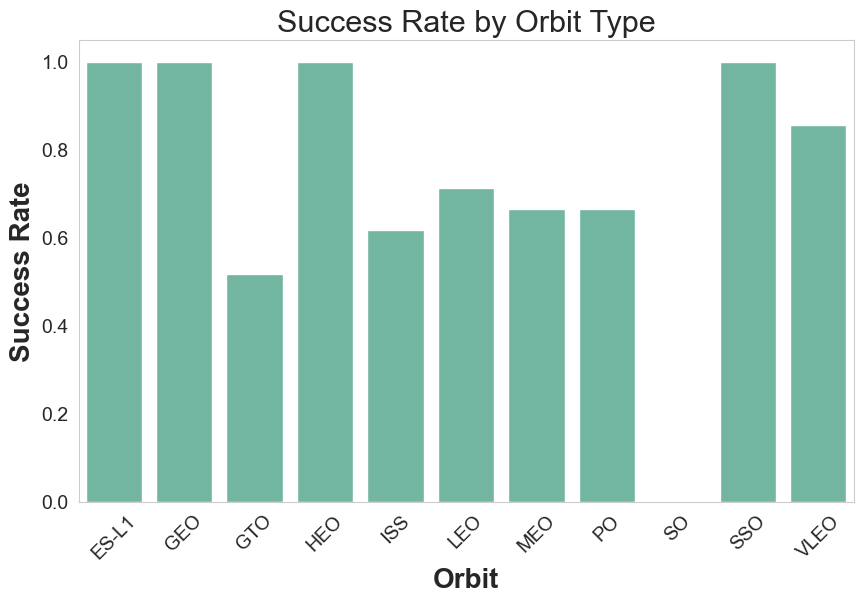

In [17]:
orbit_success_rate = df.groupby("Orbit")["Class"].mean().reset_index()

sns.set_style("whitegrid")
sns.set_palette("Set2")

plt.figure(figsize=(10, 6))
sns.barplot(x="Orbit", y="Class", data=orbit_success_rate)
plt.xlabel("Orbit", fontsize=20, weight='bold')
plt.ylabel("Success Rate", fontsize=20, weight='bold')
plt.title("Success Rate by Orbit Type", fontsize=22)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y')
plt.show()

**ES-L1, GEO, HEO, SSO:** These orbits exhibit a 100% success rate, indicating that all launches to these orbits have been successful. This high success rate could be due to well-established procedures, favorable conditions, or less complex mission requirements for these orbits.

**GTO (Geostationary Transfer Orbit)** has a notably lower success rate, around 50%. GTO missions typically involve higher payload masses and more complex maneuvers, which may contribute to a higher failure rate.

**SO** has 100% failure rate.

### FlightNumber vs. Orbit type


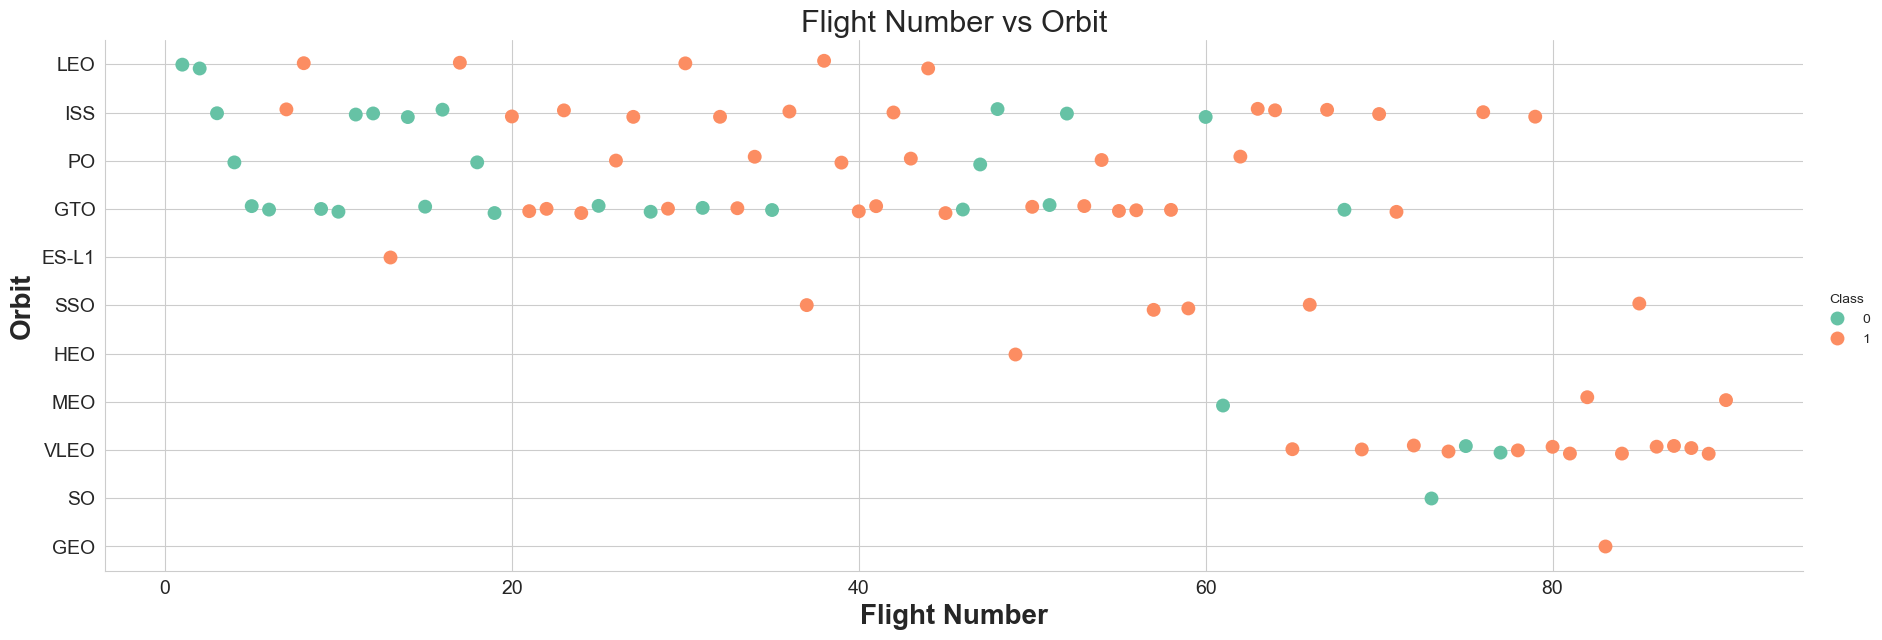

In [20]:
sns.set_style("whitegrid")
sns.set_palette("Set2")

sns.catplot(x="FlightNumber", y="Orbit", hue="Class", data=df, aspect=3, height=6, s=100)
plt.xlabel("Flight Number", fontsize=20, weight='bold')
plt.ylabel("Orbit", fontsize=20, weight='bold')
plt.title("Flight Number vs Orbit", fontsize=22)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.show()

In the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.

### Payload Mass vs. Orbit type


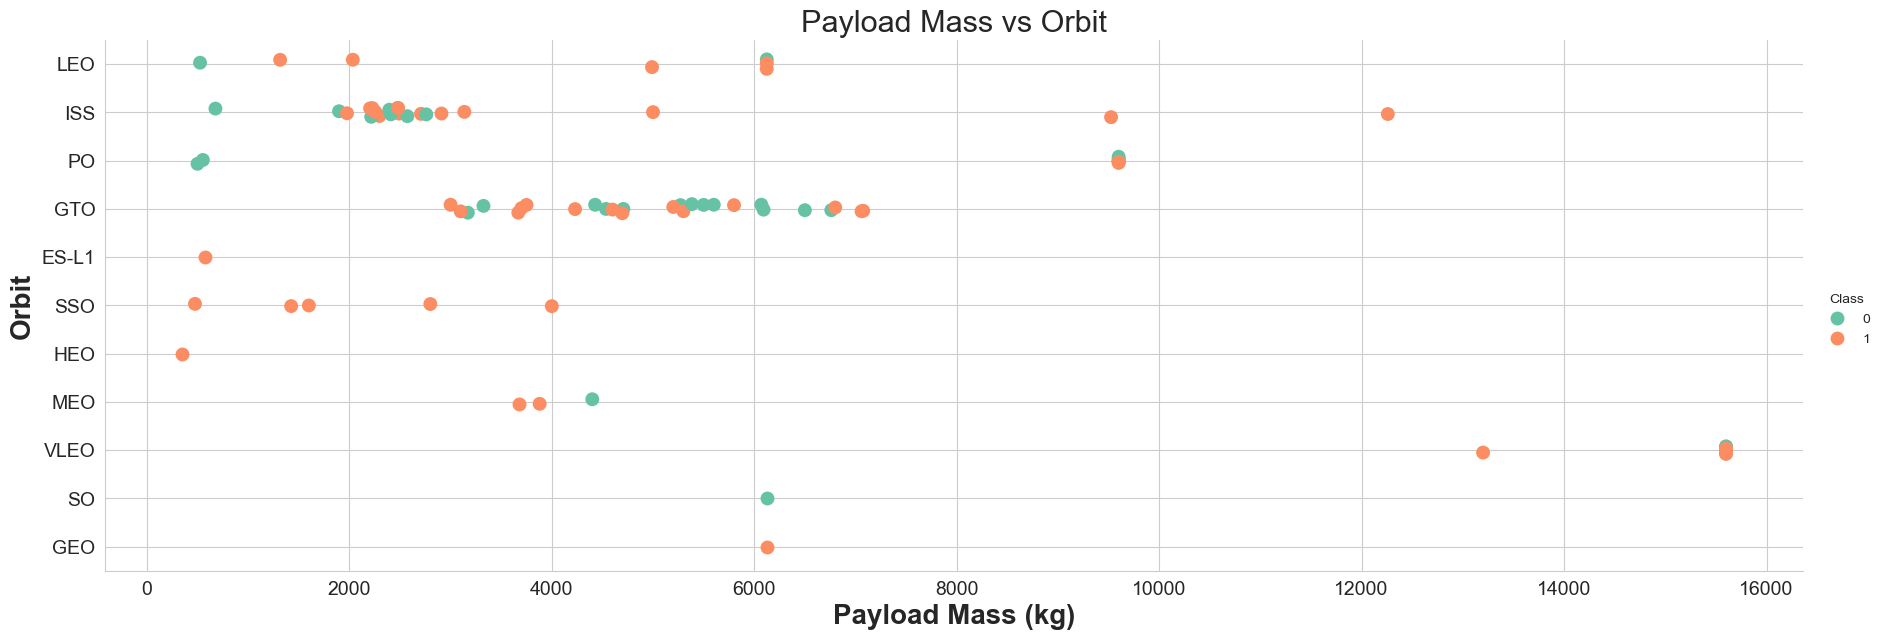

In [23]:
sns.set_style("whitegrid")
sns.set_palette("Set2")

sns.catplot(x="PayloadMass", y="Orbit", hue="Class", data=df, aspect=3, height=6, s=100)
plt.xlabel("Payload Mass (kg)", fontsize=20, weight='bold')
plt.ylabel("Orbit", fontsize=20, weight='bold')
plt.title("Payload Mass vs Orbit", fontsize=22)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar, LEO and ISS.   

However for GTO we cannot distinguish this well as both positive landing rate and negative landing (unsuccessful mission) are both there here.




### The launch success yearly trend


We plot a line chart showing the average success rate over the years.

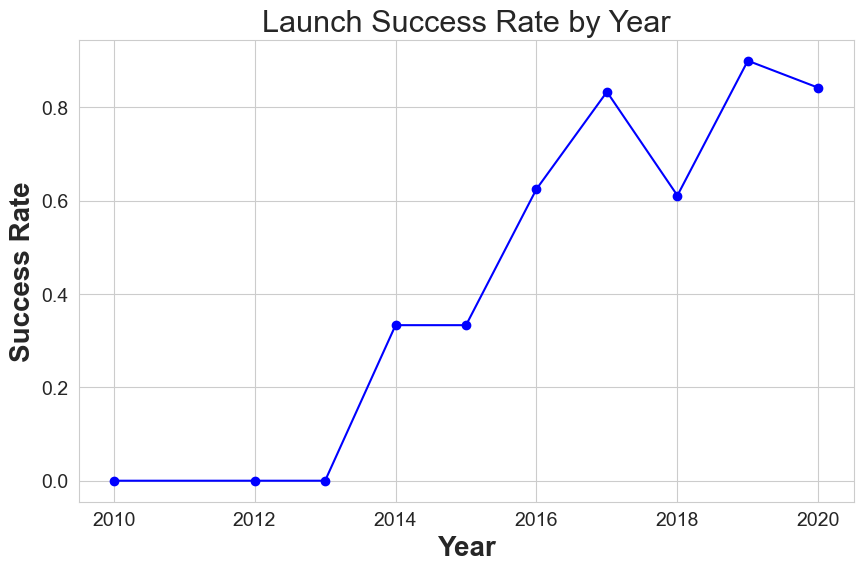

In [27]:
df["Year"] = pd.DatetimeIndex(df["Date"]).year

yearly_success_rate = df.groupby("Year")["Class"].mean().reset_index()

sns.set_style("whitegrid")
sns.set_palette("Set2")

plt.figure(figsize=(10, 6))
plt.plot(yearly_success_rate["Year"], yearly_success_rate["Class"], marker='o', linestyle='-', color='b')
plt.xlabel("Year", fontsize=20, weight='bold')
plt.ylabel("Success Rate", fontsize=20, weight='bold')
plt.title("Launch Success Rate by Year", fontsize=22)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.show()

The success rate increased steadily from 2013 to 2017, showing stability in 2014, with a marked improvement after 2015.

## Features Engineering 


Based on the preliminary insights gained, we'll select features for future success prediction models.

In [31]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


 ### Creating dummy variables to categorical columns


Using the function <code>get_dummies</code> and <code>features</code> dataframe we apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Then we assign the value to the variable <code>features_one_hot</code> and display the results using the method head.

In [34]:
features_one_hot = pd.get_dummies(df[['Orbit', 'LaunchSite', 'LandingPad', 'Serial']], prefix='', prefix_sep='')
features_one_hot.head()

,ES-L1,GEO,GTO,HEO,ISS,LEO,MEO,PO,SO,SSO,...,B1048,B1049,B1050,B1051,B1054,B1056,B1058,B1059,B1060,B1062
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Casting all numeric columns to `float64`


In [36]:
features_one_hot = features_one_hot.astype('float64')
features_one_hot.dtypes

ES-L1    float64
GEO      float64
GTO      float64
HEO      float64
ISS      float64
          ...   
B1056    float64
B1058    float64
B1059    float64
B1060    float64
B1062    float64
Length: 72, dtype: object

In [37]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)

## Author


<a href="https://www.linkedin.com/in/kristinacinova/">Kristina Cinova</a>